<a href="https://colab.research.google.com/github/AeroEng16/machine-learning-with-python-logistic-regression-3211129/blob/main/freeCodeCampMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial link - https://youtu.be/V_xro1bcAuA
https://learnpytorch.io

# Pytorch workflow



In [41]:
import torch
import numpy as np
import pandas
from torch import nn # nn contains all of Pytorch building blocks for neural nets
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

* Excel data
* Images, videos
* audio
* text

Machine learning is a game of two parts:
1. Data into numerical representation
2. Build a model to learn patterns in data

To show this we'll generate data with linear regression with *known* **parameters**

In [42]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create data

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X+bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)


In [43]:
# Create train/split
train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

**How might we better visualize data?**



In [44]:
def plotPrediction(train_data=X_train,
                   train_labels = Y_train,
                   test_data = X_test,
                   test_labels = Y_test,
                   predictions = None):
  '''
  Plots training data, test data and compares predictions.
  '''

  plt.figure(figsize=(10,7))
  #Plot training in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14});
  plt.show()

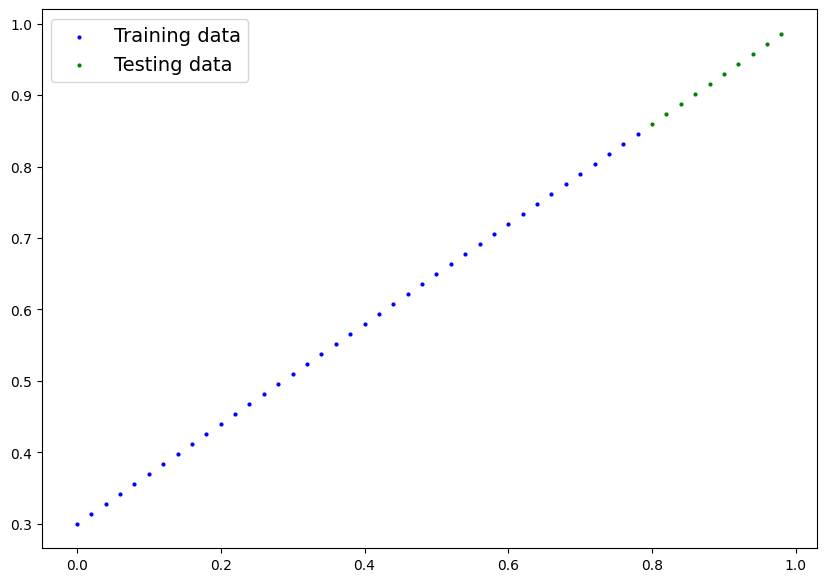

In [45]:
plotPrediction(X_train,Y_train,X_test,Y_test)

##2. Build model

Class explanation for python as torch is class heavy:

https://realpython.com/python3-object-oriented-programming/

What our model does:
* start with random values
* iterate to minimise error

Two main algorithms (3blue1brown playlist = https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi):
1. Gradient Descent
2. Backpropagation

In [46]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,                  # <- start with a random weight and adjust to ideal weight
                                            requires_grad=True, # <- can this variable be updated via gradient descent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- x is the input data
      return self.weights*x+self.bias

#### PyTorch Model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn (often a pytorch layer from torch.nn will set these for us)
* torch.nn.module - The base class for all neural network modules, if you subclass it you should overwrite the forward method.
* torch.optim - this is where the optimisers in PyTorch live, they will help with gradient descent.
* def forward() - all nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

PyTorch cheat sheet - https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our Torch model

Now we've created a model, lets see whats inside.

We can check our model parametesr using .parameters()

In [47]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of our linear regression model (a subclass of nn.module)
model_0 = LinearRegressionModel()

#Check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [48]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making preduction using torch.inference_mode()

To check models predictive power, see how well it preidcts Y-test based on X_test

When we pass data through the model, its going to run it through the forward method.


In [49]:
# Make predutcions with model
with torch.inference_mode():
  Y_preds = model_0(X_test)

Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters to some known parameters; to better represent the data.

One way to measure the model performance is to use a loss function (also known as a criterion or cost function).

* **Loss Function** - Function to measure how wrong predictions are, lower is better.
* **Optimiser** - takes into account loss of model and adjusts models parameters to reduce the loss function.
 - Insider the optimiser you'll often set two parameters. *params* - the model parameters we want to optimiser and *lr* the model learning rate

And especificaly for PyTorch, we need:
* A training loop
* A testing loop

In [50]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [51]:
# Setup a loss function

loss_fn = nn.L1Loss()


# Setup an optimiser (stochastic gradient descent)

optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01,        #lr = learning rate => possibly most important hyperparameter
                            )

loss_fn


L1Loss()

**Q**Which loss function and optimiser to use?
**A**: Very problem specific

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

Loop through the data and do:
1. Forward pass (this involves data moving through our model's `forward()` functions) - to make preducts on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to labels(
3. Optimiser zero grad
4. Loss backward - move backwards through the network to calcualte the gradients of each of the parameters of our model with respect to the loss (**backpropagation**).
5. Optimiser step - use the optimiser to adjust our model's parameters to try and improve the loss. (**gradient descent**)


In [52]:
# An epoch is one loop through the data (this is a hyperparameter as we've set it ourselves)
epochs = 200
# Track different values
epoch_count = []
loss_values =[]
test_loss_values = []
### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to 'require gradients'

    # 1. Forward pass
    y_pred = model_0(X_train)

    #2. Calculate the loss
    loss = loss_fn(y_pred,Y_train)

    #3. Optimiser zero grad
    optimiser.zero_grad()

    #4. Perform back propagation on the loss with repsect to the parameters of the model
    loss.backward()

    #5. Step the optimizer (perform the gradient descent)
    optimiser.step() # By default how the optimiser changes will accumulate through the loop so... we have to zero them above

    ###Testing
    model_0.eval() # this turns off different settings in the model not needed for evaluation/testing e.g. dropout/batch norm layers

    with torch.inference_mode():  # this turns off gradient tracking & a couple more things behind the scene
        # 1. Forward pass
        test_pred = model_0(X_test)
        # 2. Calculate loss
        test_loss=loss_fn(test_pred,Y_test)
        # Print out whats happening
        if epoch % 10 == 0:
              epoch_count.append(epoch)
              loss_values.append(loss)
              test_loss_values.append(test_loss)
              print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")


Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Test: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Test: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Test: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Test: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Test: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Test: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Test: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

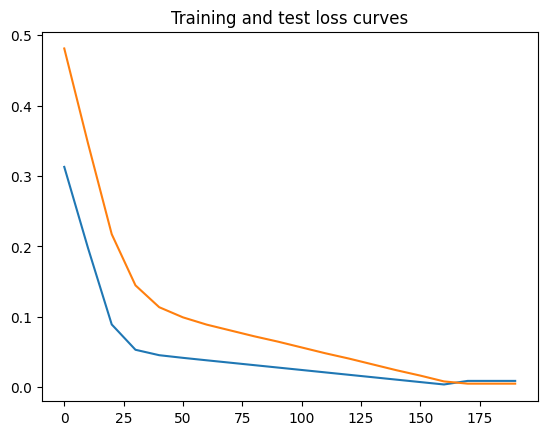

In [53]:
# Plot the loss values
plt.plot(epoch_count,torch.tensor(loss_values).cpu().numpy(),label="Train loss")
plt.plot(epoch_count,torch.tensor(test_loss_values).cpu().numpy(),label="Test loss")
plt.title("Training and test loss curves")
plt.show()

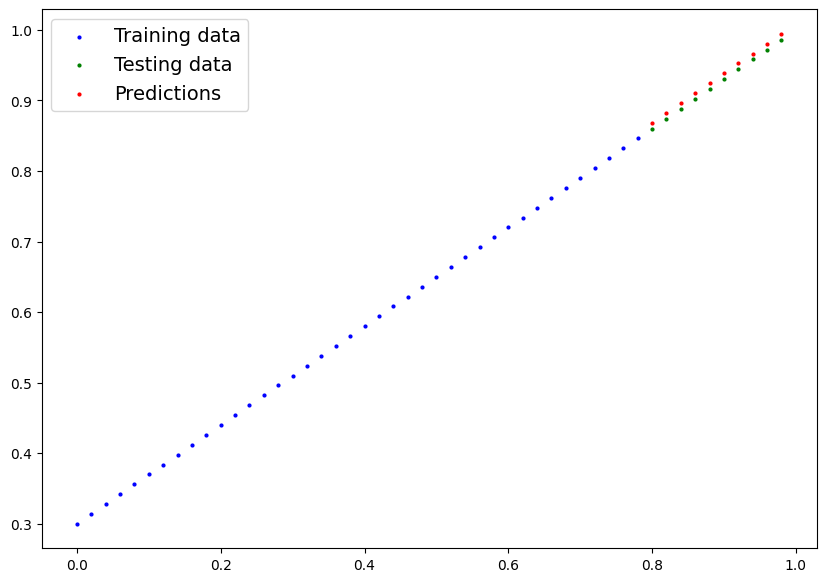

In [54]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plotPrediction(predictions = y_preds_new)

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - this allows you to save a PyTorch object in pythons pickle format.
2. `torch.load()` allows you to load a saved PyTorch object.
3. `torch.nn.module.load_state_dict()` - this allows you to load a models saved state dictionary


In [55]:
# Saving our Pytorch model

from pathlib import Path

#1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path

MODEL_NAME = "01_PyTorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to: models/01_PyTorch_workflow_model_0.pth


## Loading a PyTorch Model

Since we saved our models `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [56]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [57]:
# To load in a saved state dict we need to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [58]:
# Make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Lets go back through the steps above and see it all in one place

In [59]:
# Import PyTorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version

torch.__version__

'2.0.1+cu118'

### Create device agnostic code

This means if we've got access to a GPU, our code will use it.

If no GPU is avilable, the code will default to a CPU

In [60]:
#Setup device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
print(f" Our device is: {device}")

 Our device is: cuda


###6.1 Data


# Create some data usig the linear regression formula

In [61]:
Weight = 0.7
bias = 0.3

# Create a range of values
start = 0
end  = 1
step = 0.02

#Create features and labels
X = torch.arange(start,end,step).unsqueeze(dim=1) #without unsqueeze, errors wil pop up
Y = weight*X+bias
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [62]:
# Split data

train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

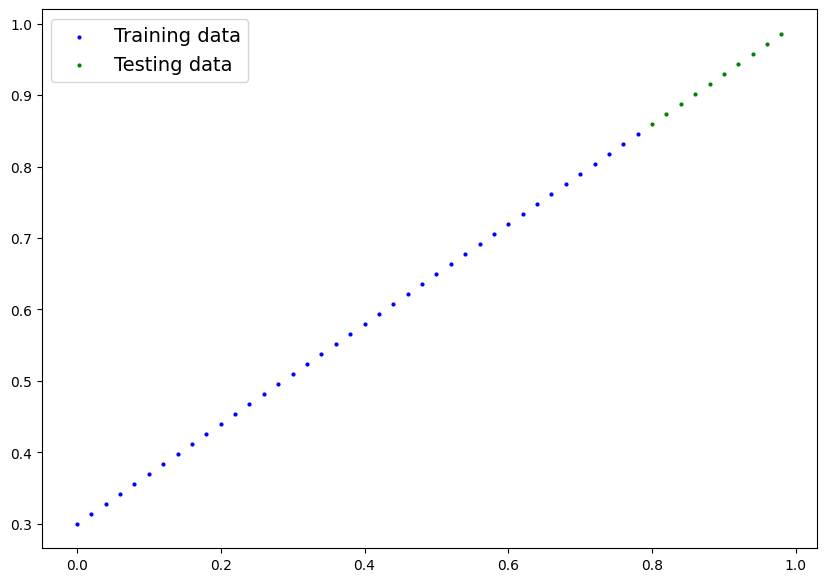

In [63]:
# Plot data

#Needs plot predictions function loaded

plotPrediction(X_train,Y_train,X_test,Y_test)

## 6.2 Building a PyTorch linear Model

In [64]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters

    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
# Set manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [65]:
# Check current device

next(model_1.parameters()).device

device(type='cpu')

In [66]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:

* loss function
* optimiser
* training loop
* testing loop

In [67]:
# Setup loss function

loss_fn = nn.L1Loss()

# Setup optimiser

optimiser = torch.optim.SGD(params = model_1.parameters(),
                              lr = 0.01
                            )




In [68]:
# Lets write a training loop

torch.manual_seed(42)

epochs = 200

# Put data on target device (device agnostic code for data)
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)


for epoch in range (epochs):
  model_1.train()

  # 1. Forward pass
  Y_pred = model_1(X_train)

  #2. Calc Loss
  loss = loss_fn(Y_pred,Y_train)

  #3. Optimiser zero grad
  optimiser.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  # 5. Optimiser step
  optimiser.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,Y_test)

  # Print out whats happening

  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss}  | test loss: {test_loss}")




Epoch: 0 | Loss: 0.5551779866218567  | test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537  | test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397  | test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355  | test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564  | test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914  | test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752  | test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156  | test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334  | test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502  | test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401  | test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385  | test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314  | test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314  | test loss: 0.0

### 6.4 Making and Evaluating predictions

In [71]:
# Turn model into eval mode
model_1.eval()

# Make preductions on the test data

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds



tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

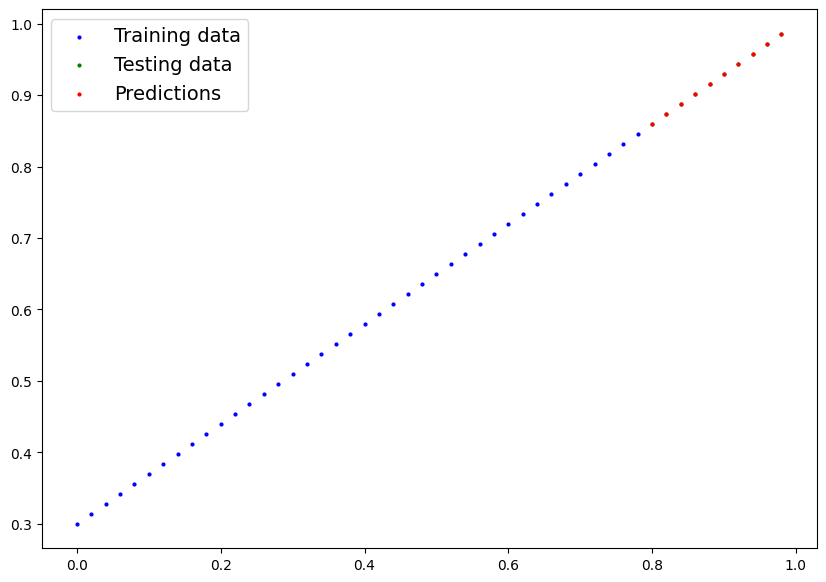

In [74]:
# Check out predictions

plotPrediction(predictions = y_preds.cpu())

### 6.5 Saving and loading a trained model

In [75]:
# Saving our Pytorch model

from pathlib import Path

#1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path

MODEL_NAME = "01_PyTorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to: models/01_PyTorch_workflow_model_1.pth



**Got to 8:20 in video**